In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#load an image from the repository (so we can compare our programs in the class)
im = imageio.imread(r'../Repositorio/Prueba_Jujuy.jpeg')
print(im.shape,im.dtype)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12276\3470336705.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(r'../Repositorio/Prueba_Jujuy.jpeg')


(458, 773, 3) uint8


(458, 773, 3) float64
Imagen Original


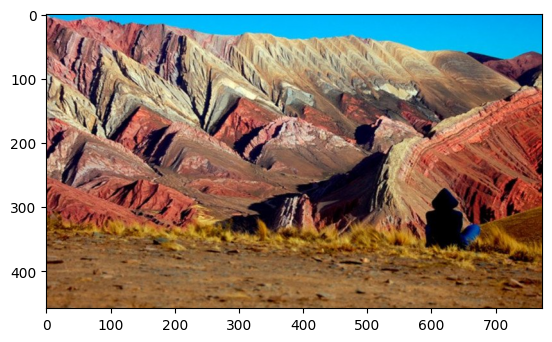

In [10]:
#1.Normalizar los valores de RGB del pixel
# we are working in float numbers [0,1] in image processing:
im = np.clip(im /255.,0.,1.)
print(im.shape,im.dtype)
print("Imagen Original")
plt.imshow(im)
plt.show()

Canales de YIQ


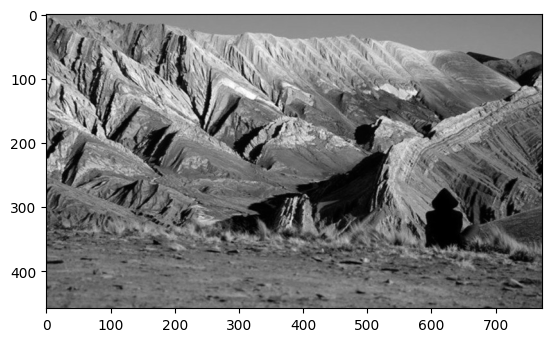

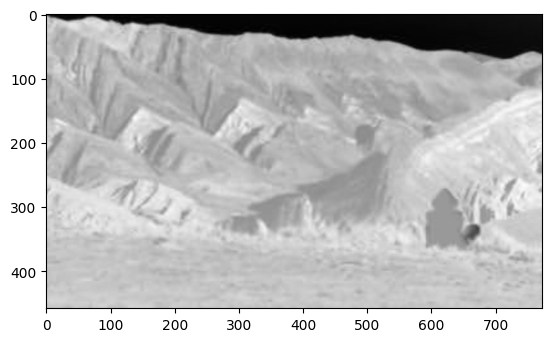

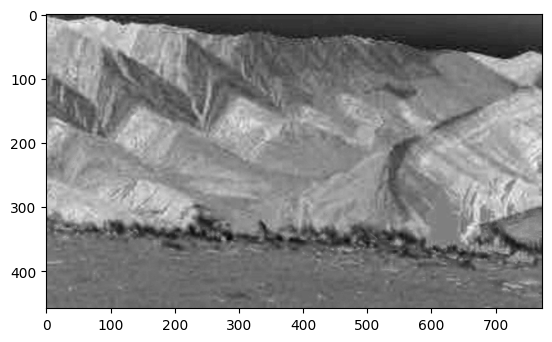

Canales de RGB


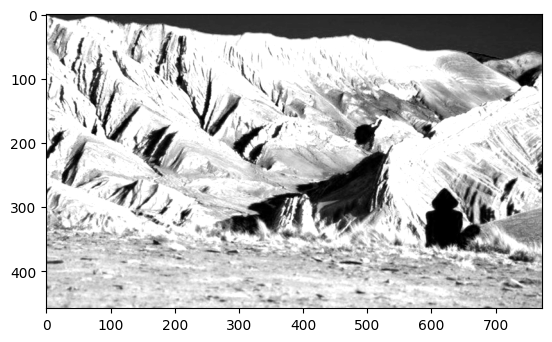

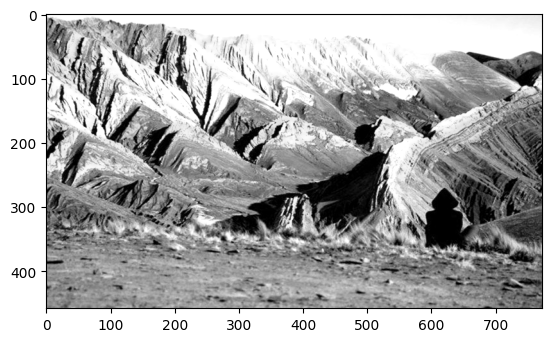

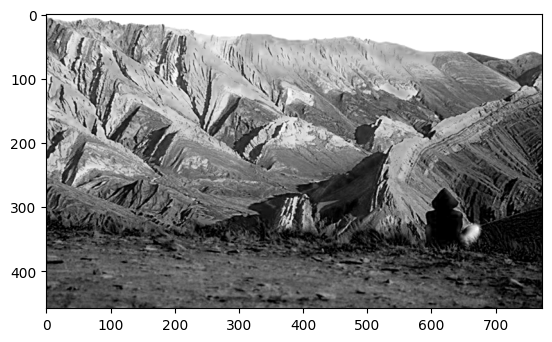

Imagen Original


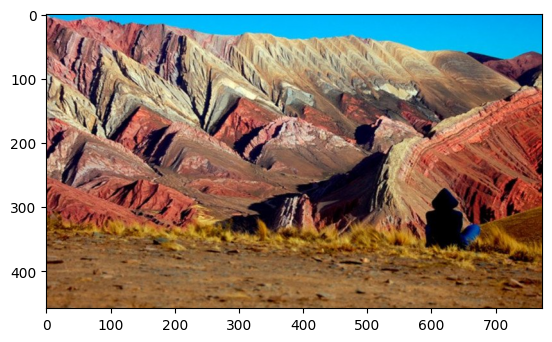

Imagen RGB Procesada


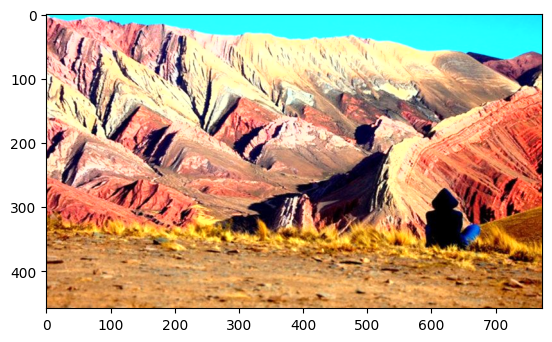

In [6]:
#2.RGB -> YIQ (utilizando la segunda matriz)
yiq=np.zeros(im.shape)
yiq[:,:,0] = np.clip(0.299 * im[:,:,0] + 0.587 * im[:,:,1] + 0.114 * im[:,:,2], 0, 1)
yiq[:,:,1] = np.clip(0.595716 * im[:,:,0] - 0.274453 * im[:,:,1] - 0.321263 * im[:,:,2], -0.5957, 0.5957)
yiq[:,:,2] = np.clip(0.211456 * im[:,:,0] - 0.522591 * im[:,:,1] + 0.311135 * im[:,:,2], -0.5226, 0.5226)

print("Canales de YIQ")
plt.imshow(yiq[:,:,0],"gray")
plt.show()
plt.imshow(yiq[:,:,1],"gray")
plt.show()
plt.imshow(yiq[:,:,2],"gray")
plt.show()

#3.Y’ := aY ;   5.Chequear que Y’ <= 1 (para que no se vaya de rango)
a = 1.5

yiq[:,:,0] = np.clip(a * yiq[:, :, 0], 0, 1)

#4.I’ := bI ; Q’ := bQ ;   6.Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
b = 1.5

yiq[:,:,1] = np.clip(b * yiq[:,:,1], -0.5957, 0.5957)
yiq[:,:,2] = np.clip(b * yiq[:,:,2], -0.5226, 0.5226)

#7.Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)
im3 = np.clip(im /255.,0.,1.) 
rgb=np.zeros(im3.shape)
rgb[:,:,0] = np.clip(yiq[:,:,0] + 0.9563 * yiq[:,:,1] + 0.6210 * yiq[:,:,2], 0, 1)
rgb[:,:,1] = np.clip(yiq[:,:,0] - 0.2721 * yiq[:,:,1] - 0.6474 * yiq[:,:,2], 0, 1)
rgb[:,:,2] = np.clip(yiq[:,:,0] - 1.1070 * yiq[:,:,1] + 1.7046 * yiq[:,:,2], 0, 1)


#8.Convertir R’G’B’ a bytes y graficar el pixel
rgb_bytes = np.uint8(rgb * 255)
print("Canales de RGB")
plt.imshow(rgb_bytes[:,:,0],"gray")
plt.show()
plt.imshow(rgb_bytes[:,:,1],"gray")
plt.show()
plt.imshow(rgb_bytes[:,:,2],"gray")
plt.show()

print("Imagen Original")
plt.imshow(im)
plt.show()

print("Imagen RGB Procesada")
plt.imshow(rgb_bytes)
plt.show()